In [1]:
import task1
import numpy as np
import sympy as sp
from sympy import symbols, Function, diff, evalf
import matplotlib.pyplot as plt

Declaring the Backtracking Line Search algorithem

In [30]:
def backtracking_line_search(f, grad_f, x_k, p_k, alpha=0.5, rho=0.5, c=0.1):
    """
    Perform a backtracking line search to find the step size.

    Parameters:
    f: Function to minimize.
    grad_f: Gradient of the function to minimize.
    x_k: Current point in the search space.
    p_k: Descent direction.
    alpha: Initial step size (default 0.5).
    rho: Contraction factor (default 0.5).
    c: Sufficient decrease constant (default 1e-4).

    Returns:
    The step size that satisfies the sufficient decrease condition.
    """
    if type(grad_f(x_k)) != np.ndarray: 
        while f(x_k + alpha * p_k) > f(x_k) + c * alpha * grad_f(x_k)* p_k:
            alpha *= rho
            #print("alpha is",alpha)
            #print("f(x_k + alpha * p_k) is",f(x_k + alpha * p_k))
            #print("f(x_k) + c * alpha * grad_f(x_k)* p_k is",f(x_k) + c * alpha * grad_f(x_k)* p_k)
        return alpha
    else:
        while f(x_k + alpha * p_k) <= f(x_k) + c * alpha * np.dot(grad_f(x_k).T, p_k):
            alpha *= rho
        return alpha

# 1. Problem
$$f(x)=x^{3}+3x^{2} +2x+4$$
$$f'(x)=3x^{2}+6x+2$$
$$f''(x)=6x+6$$

The local Minima is $x^*=-0.422649730810374$

the function is:


x**3 + 3*x**2 + 2*x + 4

the first derivative is:


3*x**2 + 6*x + 2

the second derivative is:


6*x + 6

critical points are:[-1 - sqrt(3)/3, -1 + sqrt(3)/3]
the point -1.57735026918963 is a local maximum
the point -0.422649730810374 is a local minimum


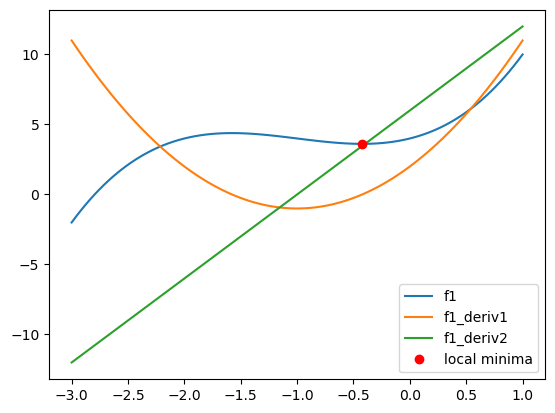

In [6]:
x, alpha = symbols('x alpha', real=True)
f1=Function('f1')(x)
f1=task1.function1(x)
print("the function is:")
display(f1)
print("the first derivative is:")
f1_deriv1=diff(f1,x)
display(f1_deriv1)
print("the second derivative is:")
f1_deriv2=diff(f1_deriv1,x)
display(f1_deriv2)

critical_points = sp.solve(f1_deriv1,x)
print(f"critical points are:{critical_points}")
x_star = []
for point in critical_points:
    if f1_deriv2.evalf(subs={x:point})>0:
        x_star.append(point)
        print(f"the point {point.evalf()} is a local minimum")
    elif f1_deriv2.evalf(subs={x:point})<0:
        print(f"the point {point.evalf()} is a local maximum")
    else:
        print(f"the point {point.evalf()} is a saddle point")


#plotting the function and its derivatives
x_vals=np.linspace(-3,1,100)
f1_vals=[f1.subs(x,val) for val in x_vals]
f1_deriv1_vals=[f1_deriv1.subs(x,val) for val in x_vals]
f1_deriv2_vals=[f1_deriv2.subs(x,val) for val in x_vals]

plt.plot(x_vals,f1_vals,label='f1')
plt.plot(x_vals,f1_deriv1_vals,label='f1_deriv1')
plt.plot(x_vals,f1_deriv2_vals,label='f1_deriv2')
plt.plot(x_star,[f1.evalf(subs={x:val}) for val in x_star],'ro',label='local minima')
plt.legend()
plt.show()

## Now applying steepest descent

In [38]:
# Numeber of iterations
n =40
# Declaring the list of x values
X = [0]*(n+1)
X[0] = 0
stopping_criterion = False
# Declaring the list of alpha values
Alpha = [1/n]*(n+1)
Alpha[0] = 0

# Starting the iterations
for i in range(n):
    # Stopping criterion
    if abs(f1_deriv1.evalf(subs={x:X[i]})) <= 10**-6:
        stopping_criterion = True
        print(f"\nthe stopping criteria has been reached at x = {X[i]} \n"+ 
        f"the value of the gradient is {abs(f1_deriv1.evalf(subs={x:X[i]}))} \n"+
        f"the value of ||x-x*|| is {abs(X[i]-x_star[0].evalf())}")
        break
    # Calculating the descent direction pk
    pk = -f1_deriv1.evalf(subs={x:X[i]})
    # Evaluating the function at the new point
    v = f1.evalf(subs={x:X[i]+Alpha[i]*pk})
    print(f"\niteration {i+1} where alpha = {Alpha[i]} and x = {X[i]} f(x) ={v}")
    # Updating the value of x and alpha
    X[i+1] = X[i] - Alpha[i]*f1_deriv1.evalf(subs={x:X[i]})
    Alpha[i+1] = backtracking_line_search(sp.lambdify(x,f1),sp.lambdify(x,f1_deriv1),x_k=X[i],p_k=pk,alpha=0.6)
    """ g = f1.subs(x,X[i]+alpha*pk)
    g_deriv1 = g.diff(alpha)
    g_deriv2 = g_deriv1.diff(alpha)
    critical_points_alpha = sp.solve(g_deriv1,alpha)
    alpha_minima = []
    for point in critical_points_alpha:
        if g_deriv2.subs(alpha,point)>0:
            alpha_minima.append(point)
            print(f"the point {point} is a local minimum for alpha")
        elif g_deriv2.subs(alpha,point)<0:
            print(f"the point {point} is a local maximum for alpha")
        else:
            print(f"the point {point} is a saddle point for alpha")
    v_alpha=np.inf
    for point in alpha_minima:
        if g.subs(alpha,point)<v_alpha:
            Alpha[i+1] = point """


iteration 1 where alpha = 0 and x = 0 f(x) =4.00000000000000

iteration 2 where alpha = 0.3 and x = 0 f(x) =3.66400000000000

iteration 3 where alpha = 0.3 and x = -0.600000000000000 f(x) =3.61587961600000

iteration 4 where alpha = 0.3 and x = -0.444000000000000 f(x) =3.61510013691089

iteration 5 where alpha = 0.3 and x = -0.422222400000000 f(x) =3.61509982103662

iteration 6 where alpha = 0.3 and x = -0.422666659555584 f(x) =3.61509982054101

iteration 7 where alpha = 0.3 and x = -0.422649066945421 f(x) =3.61509982054025

the stopping criteria has been reached at x = -0.422649756854515 
the value of the gradient is 9.02195469050172E-8 
the value of ||x-x*|| is 2.60441404553724E-8


So we end up with
$$\~x = -0.422649756854515$$
$$||\~x-x^*|| = 2.60441404553724\text{E}-8$$
$$\Vert \nabla f(x) \Vert = 9.02195469050172\text{E}-8$$


## Now applying Newton Method

In [43]:
def newton_method(f, grad_f, hess_f, x0, tolerance=1e-10, max_iterations=1000):
    temp_x = x0
    alphas = []
    for i in range(max_iterations):
        grad = grad_f(temp_x)
        hess = hess_f(temp_x)
        pk = - grad / hess
        alphas.append(backtracking_line_search(f=f,grad_f=grad_f,x_k=temp_x,p_k=pk))
        if hess == 0:
            raise ValueError("Hessian is zero, no inverse exists.")
        x_new = temp_x + alphas[i] * pk
        if abs(x_new - temp_x) < tolerance:
            print(f"Converged after {i+1} iterations.")
            return x_new
        x = x_new
    raise ValueError("Maximum iterations exceeded.")

x0 = 0
f = sp.lambdify(x,f1)
grad_f = sp.lambdify(x,f1_deriv1)
hess_f = sp.lambdify(x,f1_deriv2)
x_telda = newton_method(f, grad_f, hess_f, x0,tolerance=10**-6)
print(f"the value of x_telda is {x_telda}")


ValueError: Maximum iterations exceeded.

# 2. Problem
$$f(x) = x^3 + 2x^2 - 5x + 3$$
$$f'(x) = 3x^2 + 4x - 5$$
$$f''(x) = 6x + 4$$


# 3. Problem
$$f(x) = 4x^4 - 3x^3 + x^2 + 10$$ 
$$f'(x) = 16x^3 - 9x^2 + 2x $$
$$f''(x) = 48x^2 - 18x + 2$$


# 4. Problem
$$f(x) = -x^5 + 5x^3 - 3x^2 + 7$$
$$f'(x) = -5x^4 + 15x^2 - 6x$$
$$f''(x) = -20x^3 + 30x - 6$$


# 5. Problem
$$f(x) = 2x^3 - 8x + 4 $$
$$f'(x) = 6x^2 - 8 $$
$$f''(x) = 12x$$
